<a href="https://colab.research.google.com/github/gvigkannan/tensorflow_certification_prep/blob/chp10/hands_on_chp10_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, losses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
import torch

In [136]:
print(tf.__version__)
print(keras.__version__)

2.4.0
2.4.0


## Preprocessing

In [137]:
#Fashion MNIST!
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [138]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [178]:
X_valid, X_train = X_train_full[:5000]/255.0 ,X_train_full[5000:]/255.0 
x_valid = X_valid.reshape(5000, 784).astype("float32")
x_train= X_train.reshape(55000, 784).astype("float32")
x_test = X_test.reshape(-1, 784).astype("float32")
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Creating the Model

In [140]:
#Creating a Sequential Dense Model!
model_seq = Sequential(name= 'seq_model')
model_seq.add(layers.Flatten(input_shape = [28,28], name = 'Flatten1'))
model_seq.add(layers.Dense(300, activation= 'relu', name = 'Hidden1'))
model_seq.add(layers.Dense(100, activation = 'relu', name = 'Hidden2'))
model_seq.add(layers.Dense(10, activation = 'softmax', name = 'Output_Layer'))

In [141]:
model_seq.summary()

Model: "seq_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten1 (Flatten)           (None, 784)               0         
_________________________________________________________________
Hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
Hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [142]:
inputs = keras.Input(shape = (784, ))
img_inputs = keras.Input(shape = (28, 28), name = 'Input_Layer')
# Not sure why I am not able to implement Flatten!
#x = layers.Flatten()(img_inputs)
dense_1 = layers.Dense(300,activation = 'relu', name = 'Hidden1')(inputs)
dense_2 = layers.Dense(100, activation = 'relu' , name = 'Hidden2')(dense_1)
outputs = layers.Dense(10, activation = 'softmax', name = 'Output_Layer')(dense_2)
model_fn = keras.Model(inputs = inputs, outputs = outputs, name = 'fmnist_fn')



```
# Or if you wish to have different layers for activation

hidden_1 = layer.Dense(10)(inputs)
act_1 = layers.ReLU()(hidden_1)
```



In [143]:
model_fn.summary()

Model: "fmnist_fn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
Hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
Hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


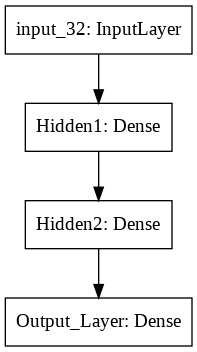

In [144]:
keras.utils.plot_model(model_fn)

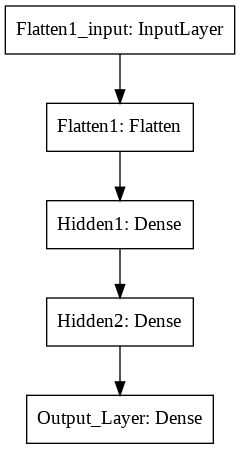

In [145]:
keras.utils.plot_model(model_seq)

In [146]:
#Number of connections = Input Dimension x Units + Units

In [147]:
display(model_fn.layers)

In [148]:
display(model_seq.layers)

In [149]:
print(model_fn.get_layer('Hidden1').name)
print(model_fn.get_layer('Hidden1').units)
print(model_fn.get_layer('Hidden1').activation)
# weights, biases = model_fn.get_weights() # How do you self a particular layer?

Hidden1
300
<function relu at 0x7fc40b7b1e18>


In [150]:
model_fn.get_layer('Hidden1').get_weights()
model_fn.get_layer('Hidden1').weights #Both are the same!

[<tf.Variable 'Hidden1/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[-0.02351779, -0.00914332,  0.07334098, ..., -0.02942192,
         -0.04543613,  0.01131753],
        [-0.05602006, -0.04936251, -0.03878827, ..., -0.05075369,
         -0.05411044,  0.00049575],
        [-0.06411851,  0.01668762,  0.02664788, ..., -0.03850789,
         -0.02336144, -0.00339259],
        ...,
        [-0.0373291 ,  0.06689234, -0.0214115 , ..., -0.03238366,
          0.02697422, -0.04269814],
        [-0.02352007, -0.02889065, -0.02544323, ...,  0.0622136 ,
         -0.05650698,  0.06734833],
        [ 0.03085423, -0.03299161,  0.0462058 , ..., -0.04639882,
         -0.01117981,  0.02952757]], dtype=float32)>,
 <tf.Variable 'Hidden1/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [151]:
# It is recommended you provide the input shape before hand
# But you can make models without inputs as well

## Compiling the Model


In [152]:
model_fn.compile( loss = 'sparse_categorical_crossentropy',
                  optimizer = 'sgd',
                  metrics = ['accuracy'])
# 'sgd' == keras.optimizer.SGD() 
#'accuracy' == keras.metrics.sparse_categorical_accuracy
model_seq.compile(  loss = 'sparse_categorical_crossentropy',
                    optimizer = 'sgd',
                    metrics = ['accuracy'])


# Refer the documentations when it doubt!
#Backpropagation == reverse-mode autodiff + Gradient Descent


## Training!

In [153]:
history_fn = model_fn.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0070 - accuracy: 0.6769 - val_loss: 0.4935 - val_accuracy: 0.8350
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4956 - accuracy: 0.8289 - val_loss: 0.4316 - val_accuracy: 0.8556
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4472 - accuracy: 0.8425 - val_loss: 0.4246 - val_accuracy: 0.8558
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4213 - accuracy: 0.8532 - val_loss: 0.3933 - val_accuracy: 0.8680
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3934 - accuracy: 0.8617 - val_loss: 0.3804 - val_accuracy: 0.8664
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3804 - accuracy: 0.8641 - val_loss: 0.3878 - val_accuracy: 0.8622
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3662 - accuracy: 0.8692 - val_loss: 0.3707 - val_accuracy:

In [156]:
#This is done not for the purpose of comparison.
# Just implementation practice!
history_seq = model_seq.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3029 - accuracy: 0.8908 - val_loss: 0.3392 - val_accuracy: 0.8770
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2959 - accuracy: 0.8936 - val_loss: 0.3187 - val_accuracy: 0.8858
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2900 - accuracy: 0.8959 - val_loss: 0.3218 - val_accuracy: 0.8850
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2847 - accuracy: 0.8972 - val_loss: 0.3162 - val_accuracy: 0.8878
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2789 - accuracy: 0.9006 - val_loss: 0.3420 - val_accuracy: 0.8780
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2733 - accuracy: 0.9012 - val_loss: 0.3367 - val_accuracy: 0.8748
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2695 - accuracy: 0.9029 - val_loss: 0.3097 - val_accuracy:

In [ ]:
#PyTorch training


In [ ]:
## Model Eval

## Model Evaluation


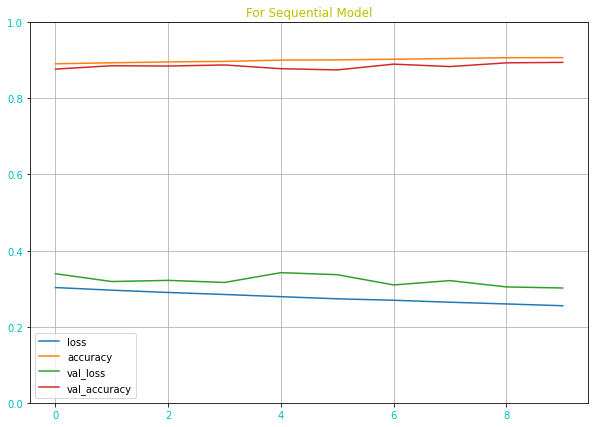

In [176]:
pd.DataFrame(history_seq.history).plot(figsize = (10, 7), grid = True)
plt.gca().set_ylim(0, 1)
plt.title("For Sequential Model", c = 'y')
plt.yticks(c = 'c')
plt.xticks(c = 'c')
plt.show()

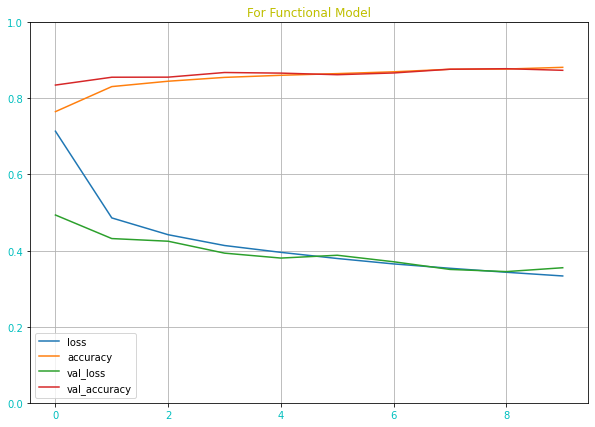

In [177]:
pd.DataFrame(history_fn.history).plot(figsize = (10, 7), grid = True)
plt.gca().set_ylim(0, 1)
plt.title("For Functional Model", c = 'y')
plt.yticks(c = 'c')
plt.xticks(c = 'c')
plt.show()

In [180]:
print(model_fn.evaluate(x_test, y_test))
print(model_seq.evaluate(X_test, y_test))

313/313 [==============================] - 0s 2ms/step - loss: 59.4018 - accuracy: 0.8416
[59.40178298950195, 0.8416000008583069]
313/313 [==============================] - 1s 2ms/step - loss: 66.4510 - accuracy: 0.8423
[66.45101165771484, 0.8422999978065491]
